##**Workflow**
0. importing the libs
1. get data ready(turn into tensors)
2. build linear reg model
3. pick loss function and optimizer
4. build a training loop
5. evaluate the model
6. test model with a new data point
7. save the model

# 0. Import the lib

In [14]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# 1. Get data ready (convert to tensor)

(this is random data)

In [15]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

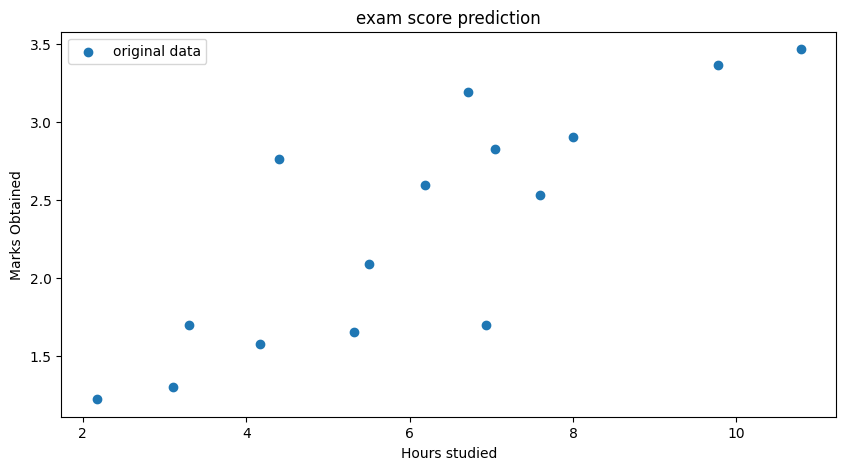

In [16]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train,label="original data")
plt.xlabel('Hours studied')
plt.ylabel('Marks Obtained')
plt.legend()
plt.title("exam score prediction")
plt.show()


In [17]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

#**2. Build a linear reg model**

In [18]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)

  def forward(self,x):
    return self.linear(x)

In [19]:
model = LinearRegression()
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [20]:
list(model.parameters())


[Parameter containing:
 tensor([[0.8173]], requires_grad=True),
 Parameter containing:
 tensor([-0.5268], requires_grad=True)]

#**3. loss function and optimizer**


In [21]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-4)

#**4.Training** **Loop**



In [22]:
num_epochs=1000


In [23]:
for epoch in range(num_epochs):
  model.train()
  out=model(x_train)
  loss=criterion(out,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch +1) % 20 == 0:
    print(f'Epoch: [{epoch +1 } / num_epochs], Loss: {loss.item():.6f}')

Epoch: [20 / num_epochs], Loss: 4.659482
Epoch: [40 / num_epochs], Loss: 3.409993
Epoch: [60 / num_epochs], Loss: 2.526857
Epoch: [80 / num_epochs], Loss: 1.902635
Epoch: [100 / num_epochs], Loss: 1.461403
Epoch: [120 / num_epochs], Loss: 1.149495
Epoch: [140 / num_epochs], Loss: 0.928985
Epoch: [160 / num_epochs], Loss: 0.773073
Epoch: [180 / num_epochs], Loss: 0.662814
Epoch: [200 / num_epochs], Loss: 0.584821
Epoch: [220 / num_epochs], Loss: 0.529630
Epoch: [240 / num_epochs], Loss: 0.490556
Epoch: [260 / num_epochs], Loss: 0.462872
Epoch: [280 / num_epochs], Loss: 0.443238
Epoch: [300 / num_epochs], Loss: 0.429294
Epoch: [320 / num_epochs], Loss: 0.419370
Epoch: [340 / num_epochs], Loss: 0.412289
Epoch: [360 / num_epochs], Loss: 0.407216
Epoch: [380 / num_epochs], Loss: 0.403562
Epoch: [400 / num_epochs], Loss: 0.400912
Epoch: [420 / num_epochs], Loss: 0.398971
Epoch: [440 / num_epochs], Loss: 0.397532
Epoch: [460 / num_epochs], Loss: 0.396447
Epoch: [480 / num_epochs], Loss: 0.395

# **5. Evaluating the model**

In [24]:

model.eval()
with torch.no_grad():
  predict=model(x_train)
predict.data.numpy()

array([[0.9257984 ],
       [1.416349  ],
       [1.9068997 ],
       [2.4465053 ],
       [2.5446153 ],
       [1.3128875 ],
       [3.8151414 ],
       [2.2110412 ],
       [2.8389459 ],
       [0.42053133],
       [2.5945623 ],
       [4.266448  ],
       [1.8235061 ],
       [3.0204496 ],
       [0.83660734]], dtype=float32)

# **Vizualizing** **the model**



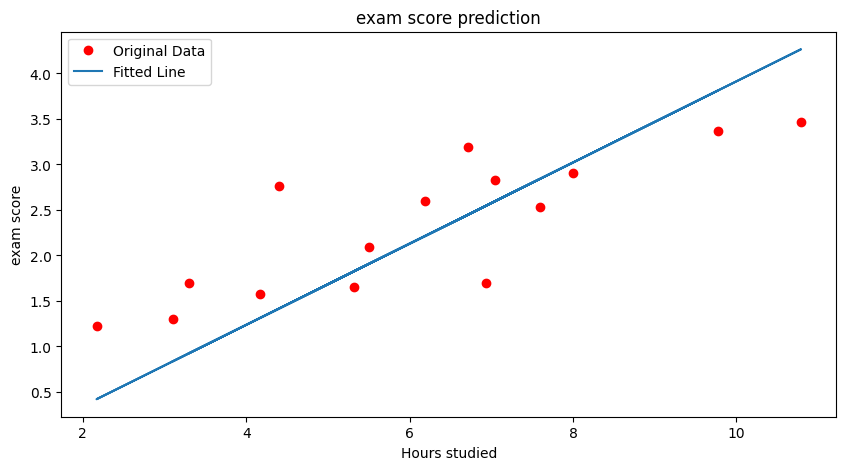

In [25]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original Data')
plt.plot(x_train.numpy(),predict,label='Fitted Line')
plt.xlabel('Hours studied')
plt.ylabel('exam score')
plt.legend()
plt.title('exam score prediction')
plt.show()

In [26]:
list(model.parameters())


[Parameter containing:
 tensor([[0.4460]], requires_grad=True),
 Parameter containing:
 tensor([-0.5459], requires_grad=True)]

# **test model with new data point**




In [27]:

new_hours_studied=8.0
new_hours_tensor=torch.tensor([[new_hours_studied]],dtype=torch.float32)

In [28]:
model.eval()
with torch.no_grad():
 new_exam_score=model(new_hours_tensor)
print('predicted sxam score for a student who studied for 8 hours ', new_exam_score.item())

predicted sxam score for a student who studied for 8 hours  3.021787405014038


#**Visulizing new data point**


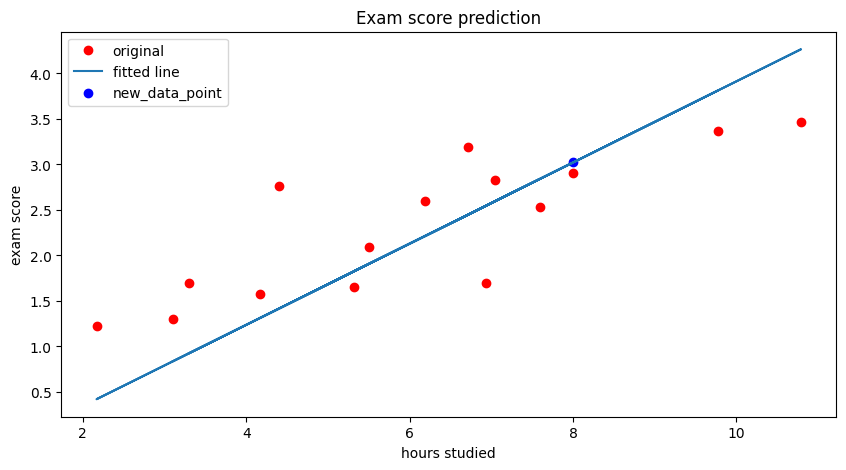

In [29]:

fig=plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='original')
plt.plot(x_train.numpy(),predict,label='fitted line')
plt.scatter([new_hours_studied],[new_exam_score.item()],color='blue',label='new_data_point')
plt.xlabel('hours studied')
plt.ylabel('exam score')
plt.legend()
plt.title('Exam score prediction')
plt.show()


#7. **Saving the model**

In [30]:
model.state_dict()


OrderedDict([('linear.weight', tensor([[0.4460]])),
             ('linear.bias', tensor([-0.5459]))])

In [31]:
torch.save(model.state_dict(),'./linearregression.pth')
